# Smart Parking Analytics 

# <img src="Capture.JPG"  style = "width:800px;height:300px" />

### Table of Contents 

1. Problem Statement
2. Data Loading and Description
3. Exploratory Data Analysis
4. The Model    
5. Model evaluation   


#### Importing Libraries 

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the file 

In [141]:
df = pd.read_excel('sampledata.xlsx', index = False )

In [142]:
df.head()

,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Date,Sensor
0,1,101,16000307,Toyota,EH 5103,16-11-2019 11:43:25,0.0
1,1,102,16000804,Skoda,MJ 1435,29-10-2019 08:22:51,0.0
2,1,103,16010329,Suzuki,OW 9335,13-11-2019 09:30:28,0.0
3,1,104,16010403,BMW,DP 7713,21-11-2019 10:00:33,1.0
4,1,138,16000307,Toyota,EH 5103,18-10-2019 09:58:01,0.0


#### Data Preprocessing 

In [143]:
df.shape

(80, 7)

In [144]:
df.columns

Index(['Floornum', 'Slotnum', 'Empid', 'Vehicletype', 'Vehiclenum', 'Date',
       'Sensor'],
      dtype='object')

In [145]:
df.dtypes

Floornum         int64
Slotnum          int64
Empid            int64
Vehicletype     object
Vehiclenum      object
Date            object
Sensor         float64
dtype: object

In [146]:
df.isnull().sum()

Floornum       0
Slotnum        0
Empid          0
Vehicletype    0
Vehiclenum     0
Date           0
Sensor         2
dtype: int64

In [147]:
new_df = df.dropna(axis = 0, inplace = False)  # drop null rows 

In [148]:
new_df.Sensor = new_df.Sensor.astype(int)   # change the format of Sensor reading from float to Int 

D:\DATASCIENCE\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [149]:
new_df.head()

,Floornum,Slotnum,Empid,Vehicletype,Vehiclenum,Date,Sensor
0,1,101,16000307,Toyota,EH 5103,16-11-2019 11:43:25,0
1,1,102,16000804,Skoda,MJ 1435,29-10-2019 08:22:51,0
2,1,103,16010329,Suzuki,OW 9335,13-11-2019 09:30:28,0
3,1,104,16010403,BMW,DP 7713,21-11-2019 10:00:33,1
4,1,138,16000307,Toyota,EH 5103,18-10-2019 09:58:01,0


#### Exploartive Data Analysis

In [123]:
# have to build something to show the relation between timimg n slots (what time which slot is filled)


Text(0.5, 1.0, 'Pair Plot')

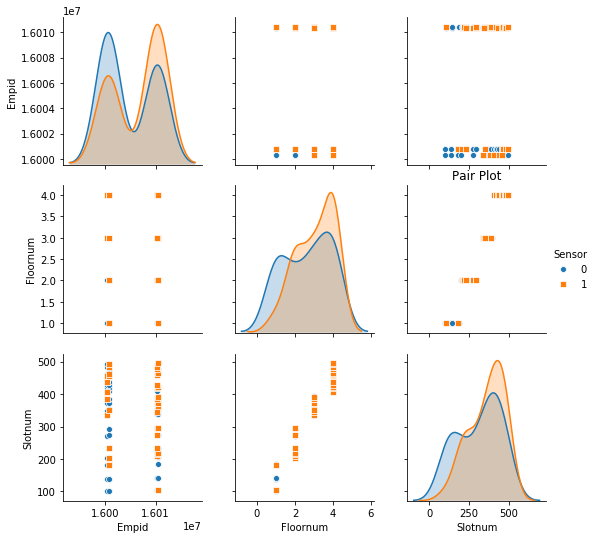

In [150]:
sns.pairplot(new_df[["Empid","Floornum","Slotnum","Sensor"]],
             vars = ["Empid","Floornum","Slotnum"],hue="Sensor", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

#### Algorithm 

#### Preparing X and y variables 

In [151]:
feature_cols = ['Empid','Sensor']
X = new_df[feature_cols]
X.head()

,Empid,Sensor
0,16000307,0
1,16000804,0
2,16010329,0
3,16010403,1
4,16000307,0


In [152]:
y = new_df.Slotnum 
y.head()

0    101
1    102
2    103
3    104
4    138
Name: Slotnum, dtype: int64

#### Splitting X and y into training and test datasets

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [154]:
print(X_train.shape)
print(y_train.shape)

(62, 2)
(62,)


In [155]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [156]:
y_pred_train = model.predict(X_train)  
y_pred_train

array([102, 102, 106, 209, 183, 101, 106, 102, 101, 140, 104, 140, 183,
       183, 209, 101, 102, 102, 209, 104, 140, 102, 102, 209, 102, 101,
       183, 101, 106, 183, 106, 101, 436, 209, 209, 140, 436, 209, 106,
       209, 106, 101, 104, 106, 106, 140, 104, 106, 101, 209, 101, 104,
       209, 140, 102, 104, 101, 102, 183, 183, 183, 104], dtype=int64)

In [157]:
y_pred_test = model.predict(X_test) 
y_pred_test

array([102, 104, 436, 436, 209, 209, 436, 102, 101, 101, 436, 104, 106,
       140, 209, 140], dtype=int64)